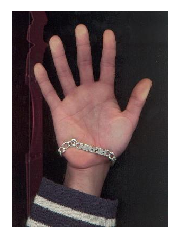

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage

img=mpimg.imread('hand.jpg')
imgplot = plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

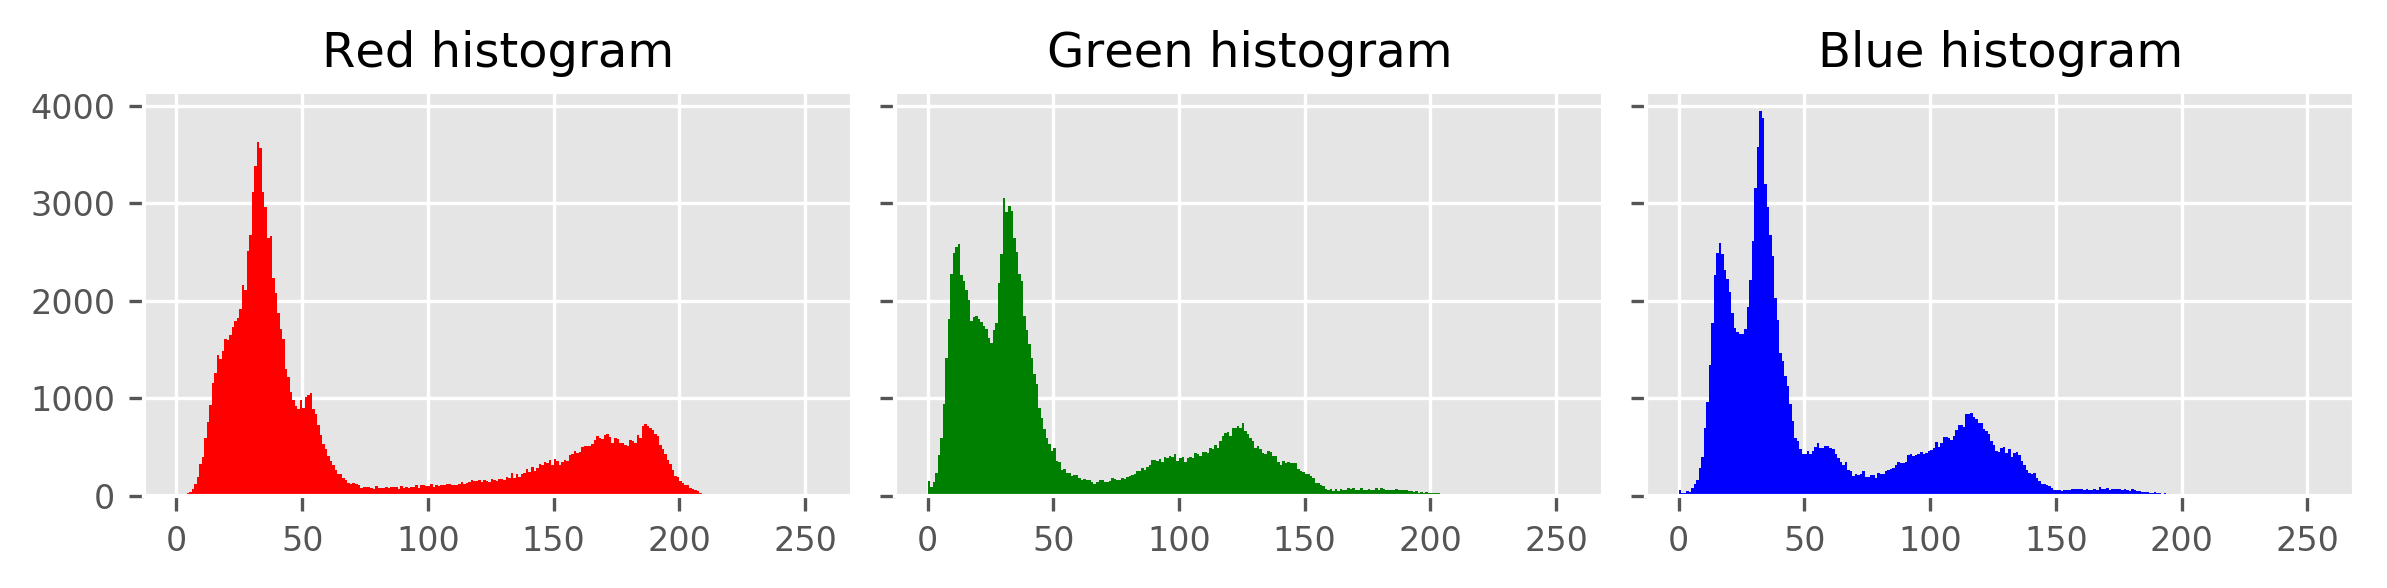

In [44]:
plt.style.use('ggplot')
font = {'size'   : 8}

matplotlib.rc('font', **font)

flat_len = img.shape[0] * img.shape[1]

img_r = [0] * (flat_len)
img_g = [0] * (flat_len)
img_b = [0] * (flat_len)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_r[i * img.shape[1] + j] = img[i][j][0]
        img_g[i * img.shape[1] + j] = img[i][j][1]
        img_b[i * img.shape[1] + j] = img[i][j][2]

f, (axR, axG, axB) = plt.subplots(1, 3, sharey=True)
f.set_dpi(300)
f.set_size_inches(8, 2)
axR.hist(img_r, 256, [0, 256], color='r')
axR.set_title("Red histogram")
axG.hist(img_g, 256, [0, 256], color='g')
axG.set_title("Green histogram")
axB.hist(img_b, 256, [0, 256], color='b')
axB.set_title("Blue histogram")

plt.tight_layout()
plt.show()

In [45]:
import numpy as np

def map_matrix(fun, matrix, square_size=1):
    if square_size == 1:
        res = np.empty((matrix.shape[0], matrix.shape[1]))
    else:
        res = np.empty((matrix.shape[0], matrix.shape[1], square_size))
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            res[i][j] = fun(matrix[i][j])
    return res

**Keep only red as gray scale**

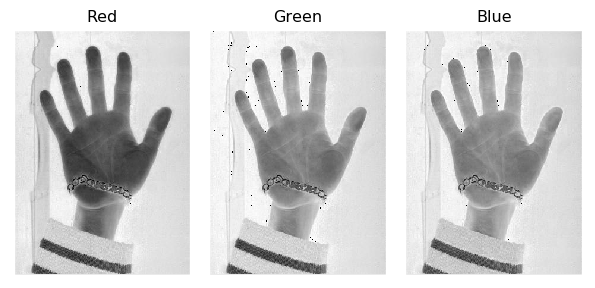

In [46]:
#plt.imshow(map_matrix(lambda x: [x[0], x[0], x[0]], img, square_size=3))
f, (red_img, green_img, blue_img) = plt.subplots(1, 3)
f.set_dpi(100)

red_img.imshow(map_matrix(lambda x: [x[0]] * 3, img, square_size=3))
red_img.set_xticks([]), red_img.set_yticks([])  # to hide tick values on X and Y axis
red_img.set_title("Red")

green_img.imshow(map_matrix(lambda x: [x[1]] * 3, img, square_size=3))
green_img.set_xticks([]), green_img.set_yticks([])  # to hide tick values on X and Y axis
green_img.set_title("Green")

blue_img.imshow(map_matrix(lambda x: [x[2]] * 3, img, square_size=3))
blue_img.set_xticks([]), blue_img.set_yticks([])  # to hide tick values on X and Y axis
blue_img.set_title("Blue")

plt.tight_layout()
plt.show()

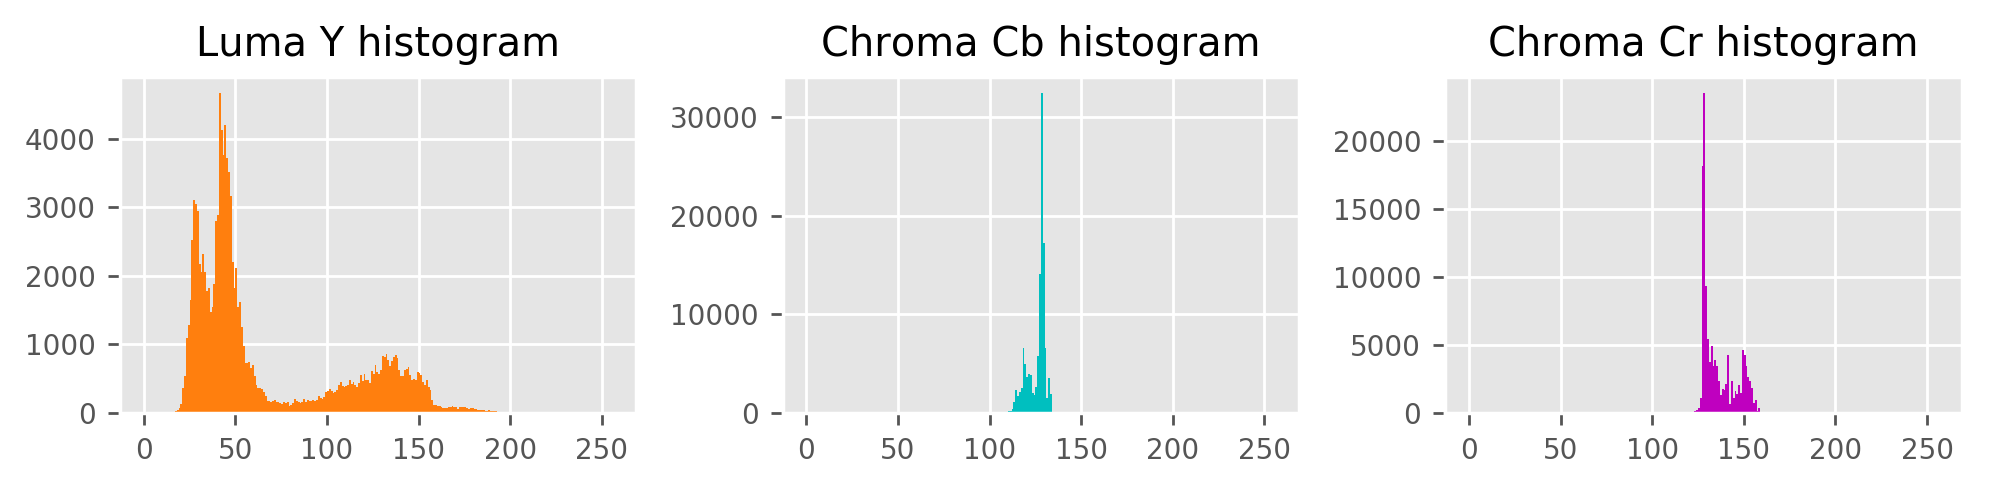

In [47]:
import skimage.color

img_ycbcr = skimage.color.rgb2ycbcr(img)
flat_len = img_ycbcr.shape[0] * img_ycbcr.shape[1]

img_y = [0] * (flat_len)
img_cb = [0] * (flat_len)
img_cr = [0] * (flat_len)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_y[i * img.shape[1] + j] = img_ycbcr[i][j][0]
        img_cb[i * img.shape[1] + j] = img_ycbcr[i][j][1]
        img_cr[i * img.shape[1] + j] = img_ycbcr[i][j][2]

f, (axY, axCB, axCR) = plt.subplots(1, 3)
f.set_dpi(250)
f.set_size_inches(8, 2)
axY.hist(img_y, 256, [0, 256], color='tab:orange')
axY.set_title("Luma Y histogram")
axCB.hist(img_cb, 256, [0, 256], color='c')
axCB.set_title("Chroma Cb histogram")
axCR.hist(img_cr, 256, [0, 256], color='m')
axCR.set_title("Chroma Cr histogram")

plt.tight_layout()
plt.show()

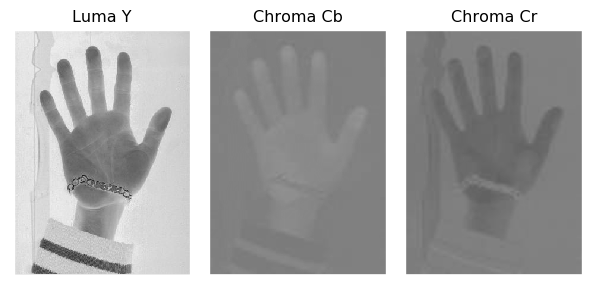

In [48]:
f, (y_img, cb_img, cr_img) = plt.subplots(1, 3)
f.set_dpi(100)

y_img.imshow(map_matrix(lambda x: [int(x[0])]*3, img_ycbcr, square_size=3))
y_img.set_xticks([]), y_img.set_yticks([])  # to hide tick values on X and Y axis
y_img.set_title("Luma Y")

cb_img.imshow(map_matrix(lambda x: [int(x[1])]*3, img_ycbcr, square_size=3))
cb_img.set_xticks([]), cb_img.set_yticks([])  # to hide tick values on X and Y axis
cb_img.set_title("Chroma Cb")

cr_img.imshow(map_matrix(lambda x: [int(x[2])]*3, img_ycbcr, square_size=3))
cr_img.set_xticks([]), cr_img.set_yticks([])  # to hide tick values on X and Y axis
cr_img.set_title("Chroma Cr")

plt.tight_layout()
plt.show()

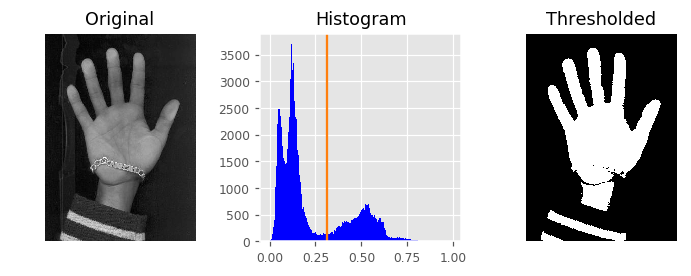

In [49]:
from skimage.filters import threshold_otsu
import skimage.color 

img_gray = skimage.color.rgb2gray(img)

def otsu(img_gray, color='b'):
    thresh = threshold_otsu(img_gray)
    binary = img_gray > thresh
    
    fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
    fig.set_dpi(110)
    ax = axes.ravel()
    ax[0] = plt.subplot(1, 3, 1, adjustable='box-forced')
    ax[1] = plt.subplot(1, 3, 2)
    ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box-forced')

    ax[0].imshow(img_gray, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].hist(img_gray.ravel(), bins=256, color=color)
    ax[1].set_title('Histogram')
    ax[1].axvline(thresh, color='tab:orange')

    ax[2].imshow(binary, cmap=plt.cm.gray)
    ax[2].set_title('Thresholded')
    ax[2].axis('off')

    plt.show()
    
    return binary
    
_ = otsu(img_gray)

### Red Otsu

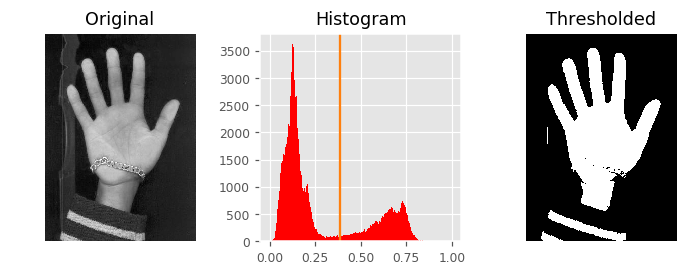

In [50]:
red_img = map_matrix(lambda x: x[0]/255, img)
red_img = otsu(red_img, color='r')

### Green Otsu

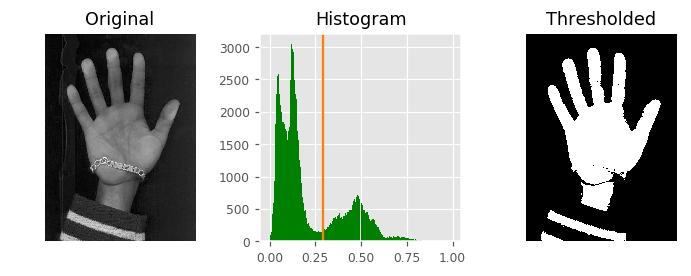

In [51]:
green_img = map_matrix(lambda x: x[1]/255, img)
green_img = otsu(green_img, color='g')

### Blue Otsu

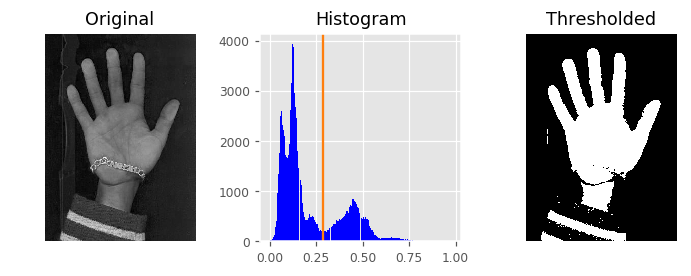

In [52]:
blue_img = map_matrix(lambda x: x[2]/255, img)
blue_img = otsu(blue_img, 'b')

### Luma Y Otsu

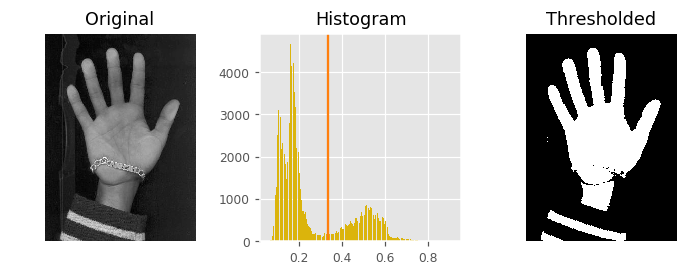

In [53]:
luma_y_img = map_matrix(lambda x: int(x[0])/255, img_ycbcr)
luma_y_img = otsu(luma_y_img, color='xkcd:gold')

### Chroma Cb Otsu

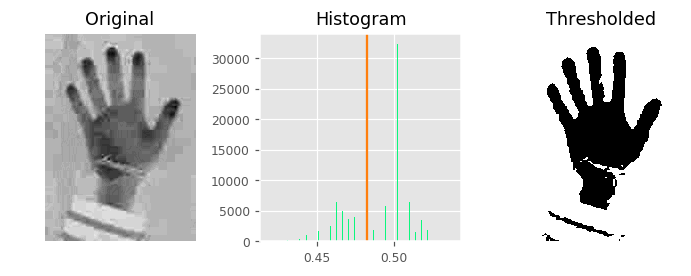

In [54]:
chroma_cb_img = map_matrix(lambda x: int(x[1])/255, img_ycbcr)
chroma_cb_img = otsu(chroma_cb_img, color='xkcd:minty green')

### Chroma Cr Otsu

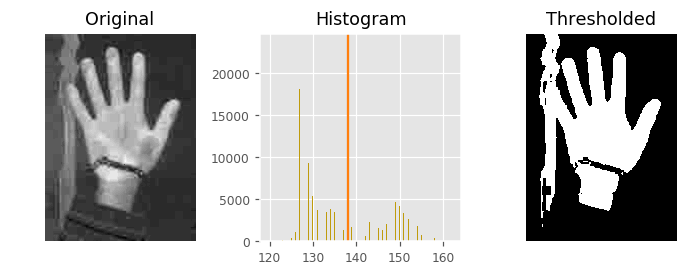

In [55]:
chroma_cr_img = map_matrix(lambda x: int(x[2]), img_ycbcr)
chroma_cr_img = otsu(chroma_cr_img, color='xkcd:ocher')

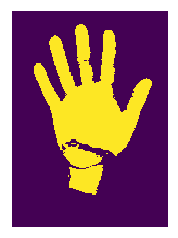

In [120]:
_img = green_img & chroma_cr_img
plt.imshow(_img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

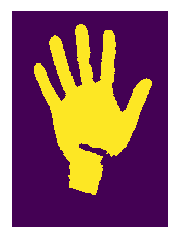

In [121]:
import skimage.morphology

_img = skimage.morphology.closing(_img, skimage.morphology.disk(4))
plt.imshow(_img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

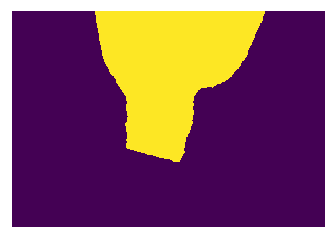

In [122]:
_img_bot = skimage.morphology.closing(_img[int(len(_img)/2):], skimage.morphology.disk(13))
plt.imshow(_img_bot)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

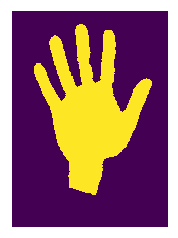

In [123]:
hand = list(_img[:int(len(_img)/2)]) + list(_img_bot)
plt.imshow(hand)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Bracelet

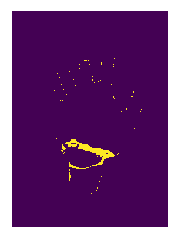

In [124]:
_img_brac = green_img & chroma_cr_img #Image with bracelet

_img = skimage.morphology.closing(_img, skimage.morphology.disk(4))
_img_bot = skimage.morphology.closing(_img[int(len(_img)/2):], skimage.morphology.disk(13))

_img_brac = hand ^ _img_brac #Xoring result with only the bracelet

plt.imshow(_img_brac)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

It remain some noise need to pass image into low-frequency filter

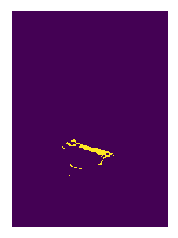

In [125]:
# A very simple and very narrow lowpass filter
kernel = np.array([[1/9., 1/9., 1/9.],
                   [1/9., 1/9., 1/9.],
                   [1/9., 1/9., 1/9.]])
lowpass_brac = ndimage.convolve(_img_brac, kernel)
plt.imshow(lowpass_brac)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

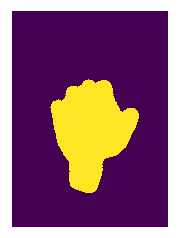

In [126]:
no_finger = skimage.morphology.opening(hand, skimage.morphology.disk(15))
plt.imshow(no_finger)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

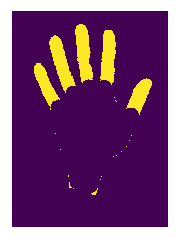

In [127]:
finger = no_finger ^ hand
plt.imshow(finger)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

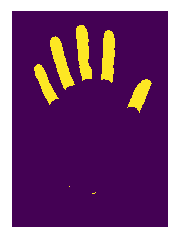

In [128]:
kernel = np.array([[1/9., 1/9., 1/9.],
                   [1/9., 1/9., 1/9.],
                   [1/9., 1/9., 1/9.]])
lowpass_fingers = ndimage.convolve(finger, kernel)
plt.imshow(lowpass_fingers)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

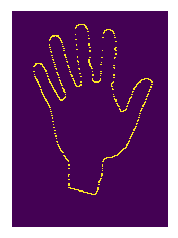

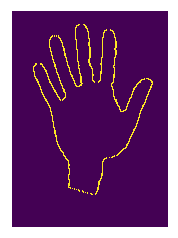

In [129]:
kernel = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
_img_lowpass = ndimage.convolve(hand, kernel)
plt.imshow(_img_lowpass)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
_img_lowpass = ndimage.convolve(hand, kernel)
plt.imshow(_img_lowpass)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

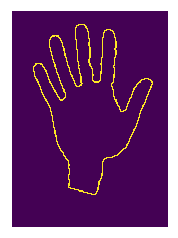

In [130]:
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
_img_lowpass = ndimage.convolve(hand, kernel)
plt.imshow(_img_lowpass)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

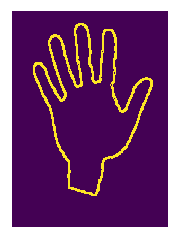

In [131]:
kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])
_img_lowpass = ndimage.convolve(hand, kernel)
plt.imshow(_img_lowpass)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

A different way to get the bracelet from the hand image. Getting the hand with the bracelet and the hand without. Opening the hand with the bracelet to remove noise around it and work with a cleaner bracelet shape.

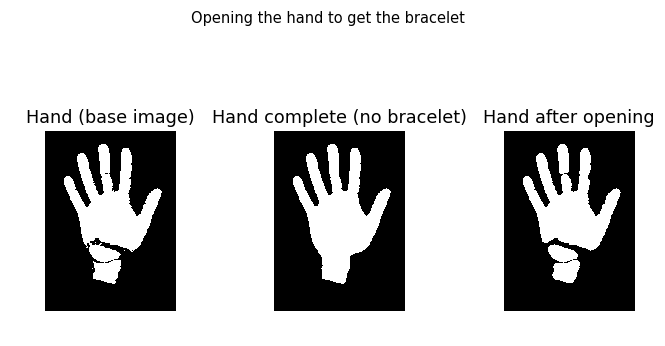

In [149]:
import copy
hand_no_bracelet = copy.deepcopy(hand) # getting the hand without bracelet from previously
hand_bracelet = green_img & chroma_cr_img
hand_opened = skimage.morphology.opening(hand_bracelet, skimage.morphology.disk(7))

fig, axes = plt.subplots(1,3)
fig.set_dpi(110)
ax = axes.ravel()

ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)

ax[0].imshow(hand_bracelet, cmap=plt.cm.gray)
ax[0].set_title('Hand (base image)')
ax[0].axis('off')

ax[1].imshow(hand_no_bracelet , cmap=plt.cm.gray)
ax[1].set_title('Hand complete (no bracelet)')
ax[1].axis('off')

ax[2].imshow(hand_opened, cmap=plt.cm.gray) 
ax[2].set_title('Hand after opening')
ax[2].axis('off')


plt.suptitle('Opening the hand to get the bracelet')
fig.tight_layout()
plt.show()

In order to isolate the bracelet, we first need to open the hand picture to separate the two parts of the hand (bottom and top of the bracelet). After that, we xor that binary image with a binary image where the bracelet doesn't appear. This leaves us the bracelet, but is still noisy. In order to remove the small dots that are noise, we open the resulting image (erosion then dilation, but the dots dissapear after erosion so aren't dilated).

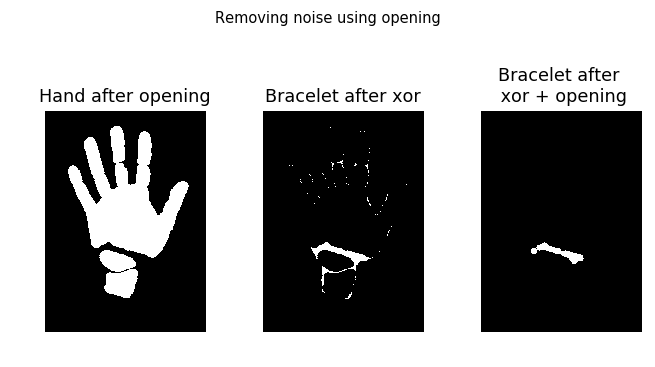

In [148]:
bracelet_noisy = hand_opened != hand_no_bracelet

bracelet_cleaned = skimage.morphology.opening(bracelet_noisy, skimage.morphology.disk(5))


fig, axes = plt.subplots(1,3)
fig.set_dpi(110)
ax = axes.ravel()

ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)

ax[0].imshow(hand_opened, cmap=plt.cm.gray)
ax[0].set_title('Hand after opening')
ax[0].axis('off')

ax[1].imshow(bracelet_noisy , cmap=plt.cm.gray)
ax[1].set_title('Bracelet after xor')
ax[1].axis('off')

ax[2].imshow(bracelet_cleaned, cmap=plt.cm.gray) 
ax[2].set_title('Bracelet after \n xor + opening')
ax[2].axis('off')


plt.suptitle('Removing noise using opening')
fig.tight_layout()
plt.show()

Different technique to get the fingers by getting the part of the hand without fingers (the palm) and then using XOR to remove it from the original image, leaving us the fingers.

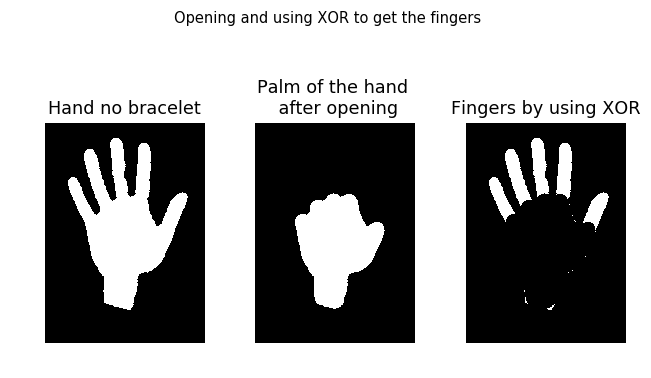

In [151]:
# Big opening needed to remove the fingers
hand_no_finger = skimage.morphology.opening(hand_no_bracelet, skimage.morphology.disk(15))

# XOR the two images
fingers = hand_no_finger != hand_no_bracelet

fig, axes = plt.subplots(1,3)
fig.set_dpi(110)
ax = axes.ravel()

ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)

ax[0].imshow(hand_no_bracelet, cmap=plt.cm.gray)
ax[0].set_title('Hand no bracelet')
ax[0].axis('off')

ax[1].imshow(hand_no_finger, cmap=plt.cm.gray)
ax[1].set_title('Palm of the hand \n after opening')
ax[1].axis('off')

ax[2].imshow(fingers, cmap=plt.cm.gray) 
ax[2].set_title('Fingers by using XOR')
ax[2].axis('off')


plt.suptitle('Opening and using XOR to get the fingers')
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()


We got the fingers, but the image is noisy. Removing noise using opening on a small size. We can now label the fingers using the labelling method (giving a value to each pixel depending on what 'part' i.e. continious area of pixels it belongs to).

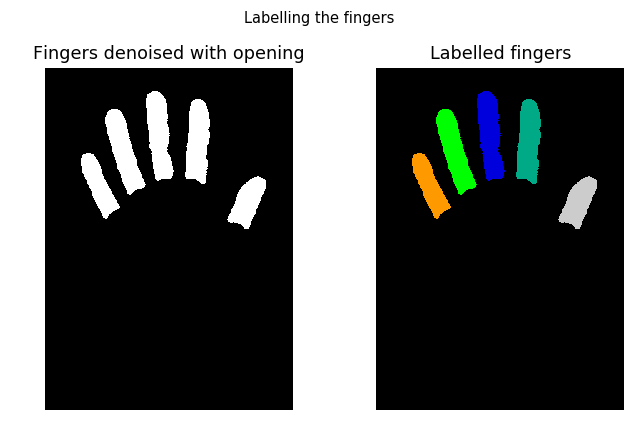

In [153]:
fingers_denoised = skimage.morphology.opening(fingers, skimage.morphology.disk(3))
labelled_fingers = skimage.measure.label(fingers_denoised)

fig, axes = plt.subplots(1,2)
fig.set_dpi(110)
ax = axes.ravel()

ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)


ax[0].imshow(fingers_denoised, cmap=plt.cm.gray)
ax[0].set_title('Fingers denoised with opening')
ax[0].axis('off')

ax[1].imshow(labelled_fingers, cmap='nipy_spectral')
ax[1].set_title('Labelled fingers')
ax[1].axis('off')

plt.suptitle('Labelling the fingers')
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.show()